# 5.3, 5.4, 5.5, 5.6, 5.7

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models,layers, regularizers

(x_train, t_train), (x_test, t_test) = datasets.cifar10.load_data()

batch_size=64

def CNN(input_dim, output_dim):
    weight_decay = 1e-4
    model = tf.keras.models.Sequential()
    model.add(layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=input_dim,padding='same', kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding='same', kernel_regularizer=regularizers.l2(weight_decay),activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(filters=256,kernel_size=(3,3),padding='same', kernel_regularizer=regularizers.l2(weight_decay),activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(512,activation='relu'))
    model.add(layers.Dense(output_dim,activation='softmax'))
    return model
    
x_train_norm = x_train / 255.
x_test_norm = x_test / 255.

In [2]:
# 損失と精度の推移をグラフにする
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(6*2, 4))
    
    ax[0].plot(history.history['accuracy'], "-", label="accuracy",c="blue")
    ax[0].plot(history.history['val_accuracy'], "-", label="val_accuracy",c="green")
    ax[0].set_title('model accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(loc="lower right")
    
    ax[1].plot(history.history['loss'], "-", label="loss", c="blue")
    ax[1].plot(history.history['val_loss'], "-", label="val_loss", c="green")
    ax[1].set_title('model loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(loc="upper left")

    plt.subplots_adjust(wspace=0.1)
    plt.show()

# 5.3 Adagrad Optimizer

<code>
tf.keras.optimizers.Adagrad(
    learning_rate = 0.001, 
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name='Adagrad'
    )
</code>

Gradient Descentを実装するオプティマイザーにおいて、初期値として設定した学習率を
自動で調整しながらパラメータの更新を行う。

$\epsilon$ は小さな正の定数である。
epoch の回数が進むたびに、学習率 $\eta_t$ が小さくなる。
勾配が小さくなると学習率を0に近づけて、学習を収束させるねらいがある。

[自分へのメモ]実際の例ではあまりうまく動作しない、と聞いた。

$\begin{eqnarray}
h_0 & = & \epsilon \\
h_t & = & h_{t-1} + \frac{\partial}{\partial w} E (w_t)^2 \\
\eta_t & = & \frac{\eta_0}{\sqrt{h_t}} \\
w_{t+1} & = & w_t - \eta_t \frac{\partial}{\partial w} E(w_t)
\end{eqnarray}$

Epoch 1/100
625/625 [==============================] - 3s 6ms/step - loss: 2.0197 - accuracy: 0.2738 - val_loss: 1.7225 - val_accuracy: 0.3952
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6440 - accuracy: 0.4163 - val_loss: 1.5820 - val_accuracy: 0.4402
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 1.4943 - accuracy: 0.4714 - val_loss: 1.3936 - val_accuracy: 0.5145
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 1.3786 - accuracy: 0.5158 - val_loss: 1.3044 - val_accuracy: 0.5479
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 1.2906 - accuracy: 0.5515 - val_loss: 1.2185 - val_accuracy: 0.5811
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 1.2161 - accuracy: 0.5791 - val_loss: 1.1555 - val_accuracy: 0.6045
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 1.1572 - accuracy: 0.6037 - val_loss: 1.1105 - val_accuracy: 0.6206

Epoch 58/100
625/625 [==============================] - 3s 5ms/step - loss: 0.3093 - accuracy: 0.9092 - val_loss: 0.7219 - val_accuracy: 0.7827
Epoch 59/100
625/625 [==============================] - 3s 4ms/step - loss: 0.3030 - accuracy: 0.9123 - val_loss: 0.7128 - val_accuracy: 0.7857
Epoch 60/100
625/625 [==============================] - 3s 5ms/step - loss: 0.2988 - accuracy: 0.9129 - val_loss: 0.7140 - val_accuracy: 0.7873
Epoch 61/100
625/625 [==============================] - 3s 4ms/step - loss: 0.2893 - accuracy: 0.9165 - val_loss: 0.7095 - val_accuracy: 0.7893
Epoch 62/100
625/625 [==============================] - 3s 4ms/step - loss: 0.2825 - accuracy: 0.9184 - val_loss: 0.7063 - val_accuracy: 0.7890
Epoch 63/100
625/625 [==============================] - 3s 5ms/step - loss: 0.2777 - accuracy: 0.9200 - val_loss: 0.7239 - val_accuracy: 0.7849
Epoch 64/100
625/625 [==============================] - 3s 4ms/step - loss: 0.2705 - accuracy: 0.9232 - val_loss: 0.7209 - val_accuracy:

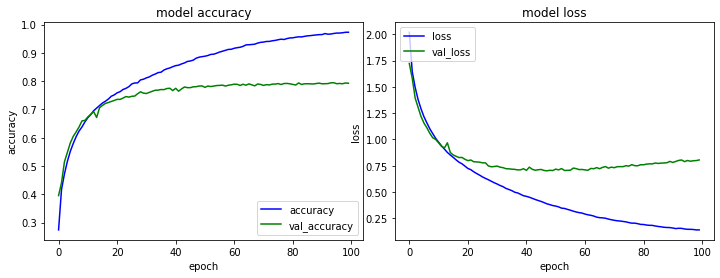

test_loss: 0.8281  test_acc: 0.7828


In [3]:
model1 = CNN(x_train_norm.shape[1:], 10)
model1.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01), ### !!! これを変更した
    metrics=['accuracy']
    )

# 学習する
history1=model1.fit(
    x_train_norm,
    t_train,
    batch_size=batch_size,
    epochs=100,
    verbose=1,
    validation_split=0.2
    )
    
plot_history(history1)
    
# 学習結果を評価する
test_loss, test_acc = model1.evaluate(x_test_norm, t_test, verbose=0)
print(f'test_loss: {test_loss:.4f}  test_acc: {test_acc:.4f}')

# 5.4 RMSprop Optimizer

Adagrad の改良版で2012年に発表された。
勾配の2乗の指数移動平均を取るように変更している。

$\begin{eqnarray}
\displaystyle h_t & = & \alpha h_{t-1} + (1- \alpha) \frac{\partial}{\partial w} E(w_t)^2 \\
\eta_t & = & \frac{\eta_0}{\sqrt{h_t} + \epsilon} \\
w_{t+1} & = & w_t - \eta_t \frac{\partial}{\partial w} E(w_t)\end{eqnarray}$


Epoch 1/100
625/625 [==============================] - 4s 7ms/step - loss: 2.9623 - accuracy: 0.2306 - val_loss: 1.6912 - val_accuracy: 0.3781
Epoch 2/100
625/625 [==============================] - 4s 6ms/step - loss: 1.7799 - accuracy: 0.3580 - val_loss: 1.6557 - val_accuracy: 0.3931
Epoch 3/100
625/625 [==============================] - 4s 6ms/step - loss: 1.6941 - accuracy: 0.3901 - val_loss: 1.6206 - val_accuracy: 0.4080
Epoch 4/100
625/625 [==============================] - 4s 6ms/step - loss: 1.6703 - accuracy: 0.4020 - val_loss: 1.5047 - val_accuracy: 0.4434
Epoch 5/100
625/625 [==============================] - 4s 6ms/step - loss: 1.6465 - accuracy: 0.4112 - val_loss: 1.5413 - val_accuracy: 0.4473
Epoch 6/100
625/625 [==============================] - 4s 6ms/step - loss: 1.6478 - accuracy: 0.4096 - val_loss: 1.5516 - val_accuracy: 0.4383
Epoch 7/100
625/625 [==============================] - 4s 7ms/step - loss: 1.6405 - accuracy: 0.4149 - val_loss: 1.6477 - val_accuracy: 0.4148

Epoch 58/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6655 - accuracy: 0.3995 - val_loss: 1.8326 - val_accuracy: 0.3585
Epoch 59/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6789 - accuracy: 0.3935 - val_loss: 1.6738 - val_accuracy: 0.3872
Epoch 60/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6707 - accuracy: 0.3960 - val_loss: 1.7358 - val_accuracy: 0.3737
Epoch 61/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6657 - accuracy: 0.3971 - val_loss: 1.5385 - val_accuracy: 0.4403
Epoch 62/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6604 - accuracy: 0.3982 - val_loss: 1.6576 - val_accuracy: 0.4095
Epoch 63/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6653 - accuracy: 0.3993 - val_loss: 1.5809 - val_accuracy: 0.4176
Epoch 64/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6526 - accuracy: 0.4043 - val_loss: 1.5338 - val_accuracy:

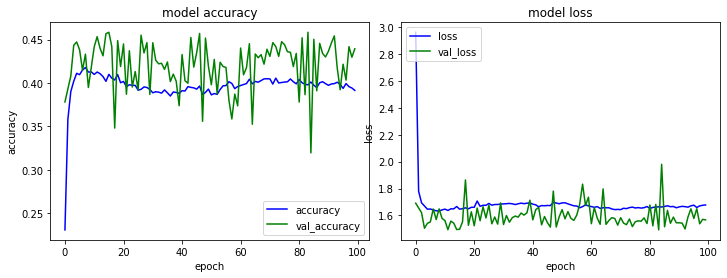

test_loss: 1.5653  test_acc: 0.4379


In [4]:
model2 = CNN(x_train_norm.shape[1:], 10)
model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01), ### !!! これを変更した
    metrics=['accuracy']
    )

# 学習する
history2=model2.fit(
    x_train_norm,
    t_train,
    batch_size=batch_size,
    epochs=100,
    verbose=1,
    validation_split=0.2
    )
    
plot_history(history2)
    
# 学習結果を評価する
test_loss, test_acc = model2.evaluate(x_test_norm, t_test, verbose=0)
print(f'test_loss: {test_loss:.4f}  test_acc: {test_acc:.4f}')

# 5.5 Adadelta Optimizer

Adagrad や RMSprop の改良版で2012年に発表された。初期学習率 $\eta_0$ がない。
$s_t$ を導入したため RMSprop よりも直近の勾配情報を優先して計算する。
パラメータは $\rho = 0.95$, $\epsilon = 10^{-6}$ が推奨されている。

$\begin{eqnarray}
h_0 & = & 0 \\
s_0 & = & 0 \\
h_t & = & \rho h_{t-1} + (1- \rho) \frac{\partial}{\partial w} E(w_t)^2 \\
\displaystyle v_t & = & \frac{\sqrt{s_t + \epsilon}}{\sqrt{h_t}+\epsilon} \frac{\partial}{\partial w} E(w_t) \\
s_{t+1} & = & \rho s_t + (1- \rho ) v_t^2 \\
w_{t+1} & = & w_t - v_t
\end{eqnarray}$

Epoch 1/100
625/625 [==============================] - 3s 5ms/step - loss: 2.3271 - accuracy: 0.1032 - val_loss: 2.3205 - val_accuracy: 0.1207
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 2.3201 - accuracy: 0.1171 - val_loss: 2.3139 - val_accuracy: 0.1673
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 2.3140 - accuracy: 0.1304 - val_loss: 2.3071 - val_accuracy: 0.2051
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 2.3072 - accuracy: 0.1490 - val_loss: 2.2996 - val_accuracy: 0.2194
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 2.3003 - accuracy: 0.1622 - val_loss: 2.2911 - val_accuracy: 0.2386
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 2.2918 - accuracy: 0.1740 - val_loss: 2.2814 - val_accuracy: 0.2513
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 2.2829 - accuracy: 0.1893 - val_loss: 2.2695 - val_accuracy: 0.2620

Epoch 58/100
625/625 [==============================] - 4s 6ms/step - loss: 1.7592 - accuracy: 0.3884 - val_loss: 1.7392 - val_accuracy: 0.4022
Epoch 59/100
625/625 [==============================] - 4s 6ms/step - loss: 1.7535 - accuracy: 0.3910 - val_loss: 1.7342 - val_accuracy: 0.4051
Epoch 60/100
625/625 [==============================] - 4s 6ms/step - loss: 1.7478 - accuracy: 0.3911 - val_loss: 1.7296 - val_accuracy: 0.4054
Epoch 61/100
625/625 [==============================] - 3s 6ms/step - loss: 1.7423 - accuracy: 0.3960 - val_loss: 1.7256 - val_accuracy: 0.4045
Epoch 62/100
625/625 [==============================] - 4s 6ms/step - loss: 1.7399 - accuracy: 0.3947 - val_loss: 1.7212 - val_accuracy: 0.4068
Epoch 63/100
625/625 [==============================] - 3s 5ms/step - loss: 1.7362 - accuracy: 0.3953 - val_loss: 1.7169 - val_accuracy: 0.4077
Epoch 64/100
625/625 [==============================] - 3s 5ms/step - loss: 1.7325 - accuracy: 0.3965 - val_loss: 1.7130 - val_accuracy:

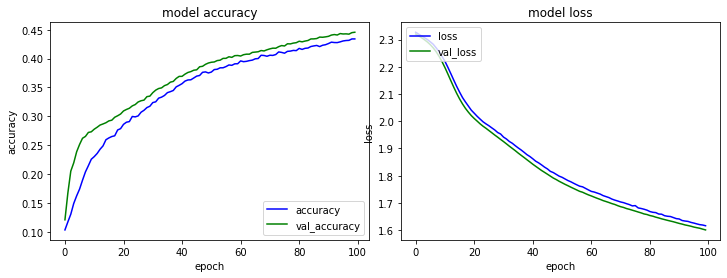

test_loss: 1.5907  test_acc: 0.4476


In [5]:
model3 = CNN(x_train_norm.shape[1:], 10)
model3.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.001), ### !!! これを変更した
    metrics=['accuracy']
    )

# 学習する
history3=model3.fit(
    x_train_norm,
    t_train,
    batch_size=batch_size,
    epochs=100,
    verbose=1,
    validation_split=0.2
    )
    
plot_history(history3)
    
# 学習結果を評価する
test_loss, test_acc = model3.evaluate(x_test_norm, t_test, verbose=0)
print(f'test_loss: {test_loss:.4f}  test_acc: {test_acc:.4f}')

# 5.6 Adam Optimizer

2015年発表。
パラメータは $ \alpha = 0.001 $, $\beta_1 = 0.9$, $beta_2 = 0.999$, $\epsilon = 10^{-8}$
が推奨されている。
移動指数平均を用いた際に生じるバイアスの影響をそれぞれ $\hat{m}$, $\hat{v}$ で無くしている。$m$ は運動量の移動平均である。勾配(加速度)　$\frac{partial}{\partial w}E(w)$ を加算すると速度となるが、$m$では過去の$m$と$beta$で内分しているので速度の移動平均となる。質量を1とおくと$m$は運動量の移動平均である。
現在、最も評価が高い手法である。

$\begin{eqnarray}
\displaystyle m_{t+1} & = & \beta_1 m_t + (1 - \beta_1)\frac{\partial}{\partial w} E(w_t) \\
v_{t+1} & = & \beta2 v_t + (1- \beta_2) \frac{\partial}{\partial w} E(w_t)^2 \\
\hat{m} & = & \frac{m_{t+1}}{1-\beta_1^t} \\
\hat{v} & = & \frac{v_{t+1}}{1-\beta_2^t} \\
w_{t+1} & = & w_t - \alpha \frac{\hat{m}}{\sqrt{\hat{v}} + \epsilon}
\end{eqnarray}$

Epoch 1/100
625/625 [==============================] - 3s 5ms/step - loss: 1.4994 - accuracy: 0.4610 - val_loss: 1.1678 - val_accuracy: 0.6017
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 1.0892 - accuracy: 0.6219 - val_loss: 0.9715 - val_accuracy: 0.6774
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 0.9290 - accuracy: 0.6873 - val_loss: 0.9150 - val_accuracy: 0.6961
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 0.8368 - accuracy: 0.7233 - val_loss: 0.8260 - val_accuracy: 0.7284
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 0.7575 - accuracy: 0.7543 - val_loss: 0.8307 - val_accuracy: 0.7314
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 0.6931 - accuracy: 0.7757 - val_loss: 0.7933 - val_accuracy: 0.7492
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 0.6285 - accuracy: 0.8038 - val_loss: 0.7628 - val_accuracy: 0.7594

Epoch 58/100
625/625 [==============================] - 3s 5ms/step - loss: 0.2135 - accuracy: 0.9663 - val_loss: 1.1574 - val_accuracy: 0.7754
Epoch 59/100
625/625 [==============================] - 3s 5ms/step - loss: 0.2138 - accuracy: 0.9664 - val_loss: 1.1416 - val_accuracy: 0.7668
Epoch 60/100
625/625 [==============================] - 3s 5ms/step - loss: 0.2108 - accuracy: 0.9673 - val_loss: 1.1151 - val_accuracy: 0.7715
Epoch 61/100
625/625 [==============================] - 3s 5ms/step - loss: 0.2105 - accuracy: 0.9664 - val_loss: 1.1462 - val_accuracy: 0.7714
Epoch 62/100
625/625 [==============================] - 3s 5ms/step - loss: 0.2038 - accuracy: 0.9695 - val_loss: 1.1607 - val_accuracy: 0.7698
Epoch 63/100
625/625 [==============================] - 3s 5ms/step - loss: 0.2055 - accuracy: 0.9678 - val_loss: 1.1713 - val_accuracy: 0.7828
Epoch 64/100
625/625 [==============================] - 3s 5ms/step - loss: 0.2100 - accuracy: 0.9673 - val_loss: 1.1276 - val_accuracy:

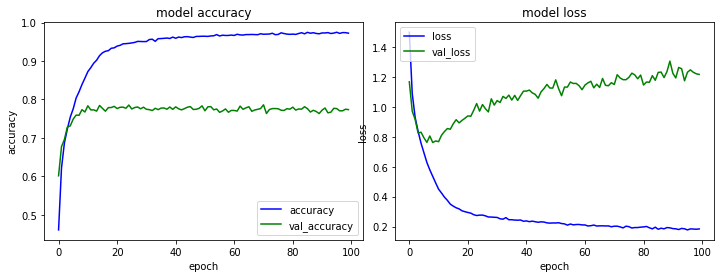

test_loss: 1.2540  test_acc: 0.7654


In [6]:
model4 = CNN(x_train_norm.shape[1:], 10)
model4.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), ### !!! これを変更した
    metrics=['accuracy']
    )

# 学習する
history4=model4.fit(
    x_train_norm,
    t_train,
    batch_size=batch_size,
    epochs=100,
    verbose=1,
    validation_split=0.2
    )
    
plot_history(history4)
    
# 学習結果を評価する
test_loss, test_acc = model4.evaluate(x_test_norm, t_test, verbose=0)
print(f'test_loss: {test_loss:.4f}  test_acc: {test_acc:.4f}')

# 5.7 Adamax Optimizer

Adam の改良版で、単語埋め込み層 (Embedding) を配置したモデルの学習に適していると言われる。

<code>
tf.keras.optimizers.Adamax(
    learning_rate = 0.001, 
    beta_1 = 0.9,
    beta_2 = 0.999, 
    epsilon=1e-07,
    name = 'adamax
    )
</code>

Epoch 1/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6063 - accuracy: 0.4227 - val_loss: 1.3477 - val_accuracy: 0.5298
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 1.2457 - accuracy: 0.5629 - val_loss: 1.1594 - val_accuracy: 0.5923
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 1.0847 - accuracy: 0.6243 - val_loss: 1.0115 - val_accuracy: 0.6596
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 0.9735 - accuracy: 0.6668 - val_loss: 0.9411 - val_accuracy: 0.6787
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 0.8920 - accuracy: 0.7006 - val_loss: 0.8804 - val_accuracy: 0.7082
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 0.8227 - accuracy: 0.7233 - val_loss: 0.8304 - val_accuracy: 0.7270
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 0.7629 - accuracy: 0.7462 - val_loss: 0.7754 - val_accuracy: 0.7466

Epoch 58/100
625/625 [==============================] - 4s 6ms/step - loss: 0.0958 - accuracy: 0.9897 - val_loss: 0.9818 - val_accuracy: 0.8086
Epoch 59/100
625/625 [==============================] - 4s 6ms/step - loss: 0.0972 - accuracy: 0.9889 - val_loss: 0.9776 - val_accuracy: 0.8078
Epoch 60/100
625/625 [==============================] - 3s 6ms/step - loss: 0.0936 - accuracy: 0.9899 - val_loss: 0.9740 - val_accuracy: 0.8081
Epoch 61/100
625/625 [==============================] - 3s 6ms/step - loss: 0.0922 - accuracy: 0.9906 - val_loss: 0.9684 - val_accuracy: 0.8078
Epoch 62/100
625/625 [==============================] - 4s 6ms/step - loss: 0.0934 - accuracy: 0.9902 - val_loss: 0.9647 - val_accuracy: 0.8071
Epoch 63/100
625/625 [==============================] - 4s 6ms/step - loss: 0.0916 - accuracy: 0.9906 - val_loss: 0.9952 - val_accuracy: 0.8043
Epoch 64/100
625/625 [==============================] - 4s 6ms/step - loss: 0.0911 - accuracy: 0.9904 - val_loss: 0.9612 - val_accuracy:

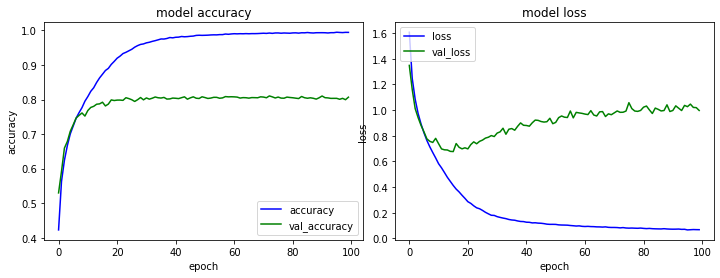

test_loss: 1.0175  test_acc: 0.7942


In [7]:
model5 = CNN(x_train_norm.shape[1:], 10)
model5.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001), ### !!! これを変更した
    metrics=['accuracy']
    )

# 学習する
history5=model5.fit(
    x_train_norm,
    t_train,
    batch_size=batch_size,
    epochs=100,
    verbose=1,
    validation_split=0.2
    )
    
plot_history(history5)
    
# 学習結果を評価する
test_loss, test_acc = model5.evaluate(x_test_norm, t_test, verbose=0)
print(f'test_loss: {test_loss:.4f}  test_acc: {test_acc:.4f}')